In [2]:
import pandas as pd

In [3]:
label_df = pd.read_csv("/home/kongge/projects/Phd/data/all_labels.csv")

In [4]:
prs_df = pd.read_csv('/home/kongge/projects/Phd/data/Only_PGS.csv')

In [5]:
print("Labels DataFrame shape:", label_df.shape)
print("PRS DataFrame shape:", prs_df.shape)

Labels DataFrame shape: (336979, 106)
PRS DataFrame shape: (336979, 81)


In [6]:
label_df.head()

,eid,Class_A00,Class_A01,Class_A02,Class_A03,Class_A04,Class_A05,Class_A06,Class_A07,Class_A08,...,Class_I48,Class_I63,Class_I10,Class_F00,Class_F20,Class_C50,Class_C18,Class_C56,Class_J45,Class_M05
0,1000011,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000026,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1000044,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000058,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1000116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
prs_df.head()

,FID,AF,CAD,DCM,HT,ISS,VTE,STK,HF,IH,...,GM,HB,HIR,IRM,ISM,NMR,PM,TSH,TM,AST
0,1000011,-0.141637,-0.477495,-0.195173,0.931986,-0.894940,-0.473692,-0.317333,-1.737386,0.020924,...,0.079802,0.695521,1.277698,1.504517,-1.692002,-1.071869,-1.125821,-0.288634,1.733040,-0.264657
1,1000026,-1.473287,0.367636,-1.566975,0.309153,-0.882619,1.044783,-0.128957,-1.362442,-0.811806,...,0.026687,1.076239,0.824551,0.690095,0.018237,-1.071869,-0.092784,0.843544,0.983909,-0.596751
2,1000044,0.585503,2.575461,1.860125,1.589465,0.237156,0.309952,0.659745,-0.803434,-1.499108,...,-1.726094,1.125755,-0.352180,-0.544924,-0.093467,-0.784642,-0.278345,0.444989,0.895999,0.153730
3,1000058,0.847278,1.352384,-1.004531,1.490209,1.398947,-1.508763,1.176881,-1.164744,1.711949,...,0.132917,0.406527,-0.551243,-0.256447,1.001336,-1.071869,1.090921,-0.241189,0.366977,-0.084286
4,1000116,-0.805020,-1.414212,-1.471695,-0.624252,-0.147236,-1.015938,-0.131356,-1.573774,-0.979470,...,1.752911,-0.531077,0.120916,-0.138439,0.928665,0.565118,-0.054315,-1.173920,-0.205888,-0.852839


Text(0, 0.5, 'Frequency')

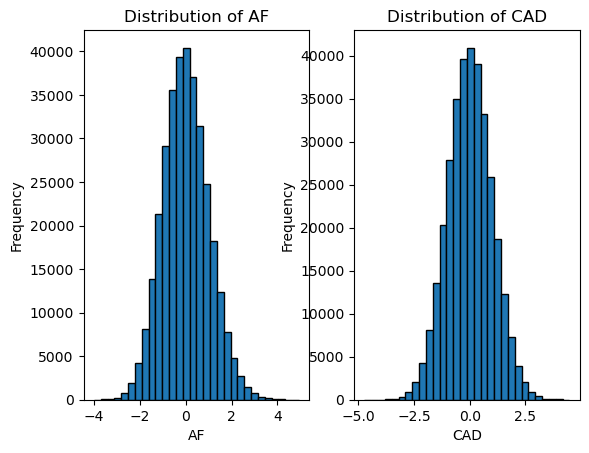

In [8]:
# 查看PRS 数值分布情况

import matplotlib.pyplot as plt
column1 = 'AF'
column2 = 'CAD'


plt.subplot(1, 2, 1)
plt.hist(prs_df[column1], bins=30, edgecolor='black')
plt.title(f'Distribution of {column1}')
plt.xlabel(column1)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(prs_df[column2], bins=30, edgecolor='black')
plt.title(f'Distribution of {column2}')
plt.xlabel(column2)
plt.ylabel('Frequency')

In [9]:
# 正态分布，没问题

In [10]:
data = pd.merge(prs_df, label_df, left_on='FID', right_on='eid')

In [11]:
data.shape

(336979, 187)

In [12]:
# 检查缺失值
missing_values = data.isnull().sum()

In [13]:
# 计算每个疾病的患病率
label_distribution = label_df.drop('eid', axis=1).mean()

In [14]:
label_distribution

Class_A00    0.000053
Class_A01    0.000249
Class_A02    0.001644
Class_A03    0.000436
Class_A04    0.017345
               ...   
Class_C50    0.037670
Class_C18    0.020853
Class_C56    0.004033
Class_J45    0.146825
Class_M05    0.026218
Length: 105, dtype: float64

In [15]:
disease_prevalence = pd.DataFrame({
    'Disease': label_distribution.index,
    'Prevalence': label_distribution.values
})

In [16]:
# 挑选出患病率比较高的几种，如果这几种性能都很差，感觉就不需要实验了
disease_prevalence_sorted = disease_prevalence.sort_values(by='Prevalence', ascending=False)

In [17]:
disease_prevalence_sorted

,Disease,Prevalence
97,Class_I10,0.403233
103,Class_J45,0.146825
94,Class_I25,0.117286
95,Class_I48,0.088644
62,Class_F17,0.088626
...,...,...
24,Class_D60,0.000036
19,Class_D55,0.000033
41,Class_E12,0.000018
70,Class_G07,0.000009


In [18]:
from collections import Counter

In [19]:
Counter(label_df['Class_I10']) # 什么病 40% 的人都有啊？ 幽门螺杆菌感染？ 疾病与疾病之间肯定是有关联的

Counter({0: 201098, 1: 135881})

In [20]:
# 有些疾病甚至没有人 得，所以更加说明 指标ACC没有什么参考意义

In [21]:
# 计算相关系数，疾病之间的使用皮尔逊
correlation_matrix = label_df.drop('eid', axis=1).corr()

In [22]:
correlation_matrix

,Class_A00,Class_A01,Class_A02,Class_A03,Class_A04,Class_A05,Class_A06,Class_A07,Class_A08,Class_A09,...,Class_I48,Class_I63,Class_I10,Class_F00,Class_F20,Class_C50,Class_C18,Class_C56,Class_J45,Class_M05
Class_A00,1.000000,-0.000115,-0.000297,-0.000153,-0.000971,-0.000205,-0.000108,-0.000248,-0.000789,-0.001751,...,0.000578,-0.001414,-0.001041,-0.000702,-0.000352,-0.001446,0.001775,-0.000465,0.000410,-0.001199
Class_A01,-0.000115,1.000000,0.008639,-0.000330,0.000782,-0.000444,0.012453,0.005023,0.000056,0.004512,...,0.001028,-0.001040,0.001582,-0.001516,-0.000761,0.000825,0.000327,-0.001005,-0.003364,0.002115
Class_A02,-0.000297,0.008639,1.000000,-0.000848,0.018734,0.009292,0.004342,0.009453,0.005226,0.015167,...,0.001518,0.001178,0.005914,-0.002355,-0.000433,-0.000719,-0.000796,0.003197,0.003448,0.000218
Class_A03,-0.000153,-0.000330,-0.000848,1.000000,0.004844,-0.000587,-0.000310,0.003494,0.000407,0.004402,...,-0.001515,0.002052,-0.003556,-0.002005,-0.001007,0.002584,-0.000065,-0.001329,0.001372,0.000130
Class_A04,-0.000971,0.000782,0.018734,0.004844,1.000000,0.010025,0.002633,0.015661,0.045706,0.077405,...,0.035098,0.022664,0.035452,0.015683,0.001632,0.003082,0.012426,0.006968,0.018741,0.020166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Class_C50,-0.001446,0.000825,-0.000719,0.002584,0.003082,-0.002231,-0.001880,-0.000710,0.003313,0.016837,...,-0.006648,-0.006873,0.004142,0.002800,-0.002729,1.000000,0.000250,0.014216,0.007363,0.004603
Class_C18,0.001775,0.000327,-0.000796,-0.000065,0.012426,-0.001144,-0.000761,-0.000644,0.007395,0.046969,...,0.036322,0.010835,0.040875,0.001274,0.002468,0.000250,1.000000,0.009064,0.003712,0.000099
Class_C56,-0.000465,-0.001005,0.003197,-0.001329,0.006968,-0.000121,-0.000943,0.000614,0.001902,0.021328,...,-0.000736,0.002244,0.002673,-0.002663,-0.001120,0.014216,0.009064,1.000000,-0.001394,0.006555
Class_J45,0.000410,-0.003364,0.003448,0.001372,0.018741,0.002969,0.001208,0.001816,0.019303,0.041467,...,0.031511,0.014872,0.053281,0.004691,0.007206,0.007363,0.003712,-0.001394,1.000000,0.036459


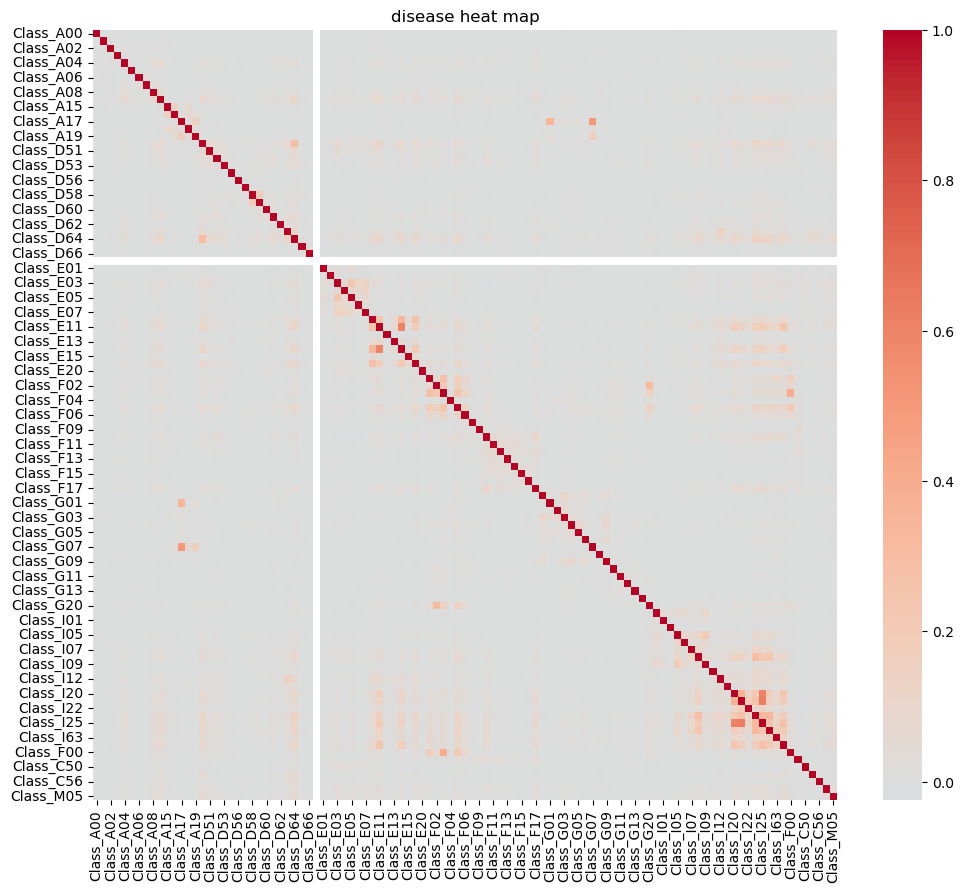

In [23]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('disease heat map')
plt.show()

In [24]:
# 提取相关性大于 0.5 的疾病对
high_corr_pairs = correlation_matrix.where((correlation_matrix > 0.5) & (correlation_matrix < 1)).stack().reset_index()
high_corr_pairs.columns = ['Disease1', 'Disease2', 'Correlation']
high_corr_pairs

,Disease1,Disease2,Correlation
0,Class_E11,Class_E14,0.598814
1,Class_E14,Class_E11,0.598814
2,Class_I20,Class_I25,0.604077
3,Class_I21,Class_I25,0.631300
4,Class_I25,Class_I20,0.604077
5,Class_I25,Class_I21,0.631300


In [25]:
top_20_pairs = (
    correlation_matrix
    .where(correlation_matrix < 1)  # 排除对角线
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Disease1', 'level_1': 'Disease2', 0: 'Correlation'})
)
top_20_pairs = top_20_pairs.sort_values(by='Correlation', ascending=False).head(20)
top_20_pairs

,Disease1,Disease2,Correlation
9669,Class_I25,Class_I21,0.631300
9362,Class_I21,Class_I25,0.631300
9668,Class_I25,Class_I20,0.604077
9259,Class_I20,Class_I25,0.604077
4365,Class_E14,Class_E11,0.598814
4058,Class_E11,Class_E14,0.598814
7119,Class_G07,Class_A17,0.499993
1304,Class_A17,Class_G07,0.499993
5040,Class_F03,Class_F00,0.398515
10039,Class_F00,Class_F03,0.398515


In [26]:
# 虽然在热力图中，横纵坐标的顺序为按照字母次序进行排列，但是在实质上，会按照首字母呈次序分块排布，所以可以推测：疾病前面的A D E F G I 为大类疾病 后面的数字表示小类疾病，后面的top20也可以验证，Ixx1 与 Ixx2 有比较强的相关关系，所以在设计预测器时，可以先分类 大类疾病，在设计小类疾病

In [27]:
# 聚类看一下
# from scipy.cluster.hierarchy import linkage, dendrogram
#
# linked = linkage(correlation_matrix, method='ward')
#
# plt.figure(figsize=(18, 10))
# dendrogram(linked, labels=correlation_matrix.columns, orientation='right')
# plt.title('105 disease cluster')
# plt.xlabel('distance')
# plt.ylabel('disease')
# plt.show()

In [28]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# 转换为距离矩阵（使用1 - correlation_matrix）
distance_matrix = 1 - correlation_matrix

linked = linkage(distance_matrix, method='ward')

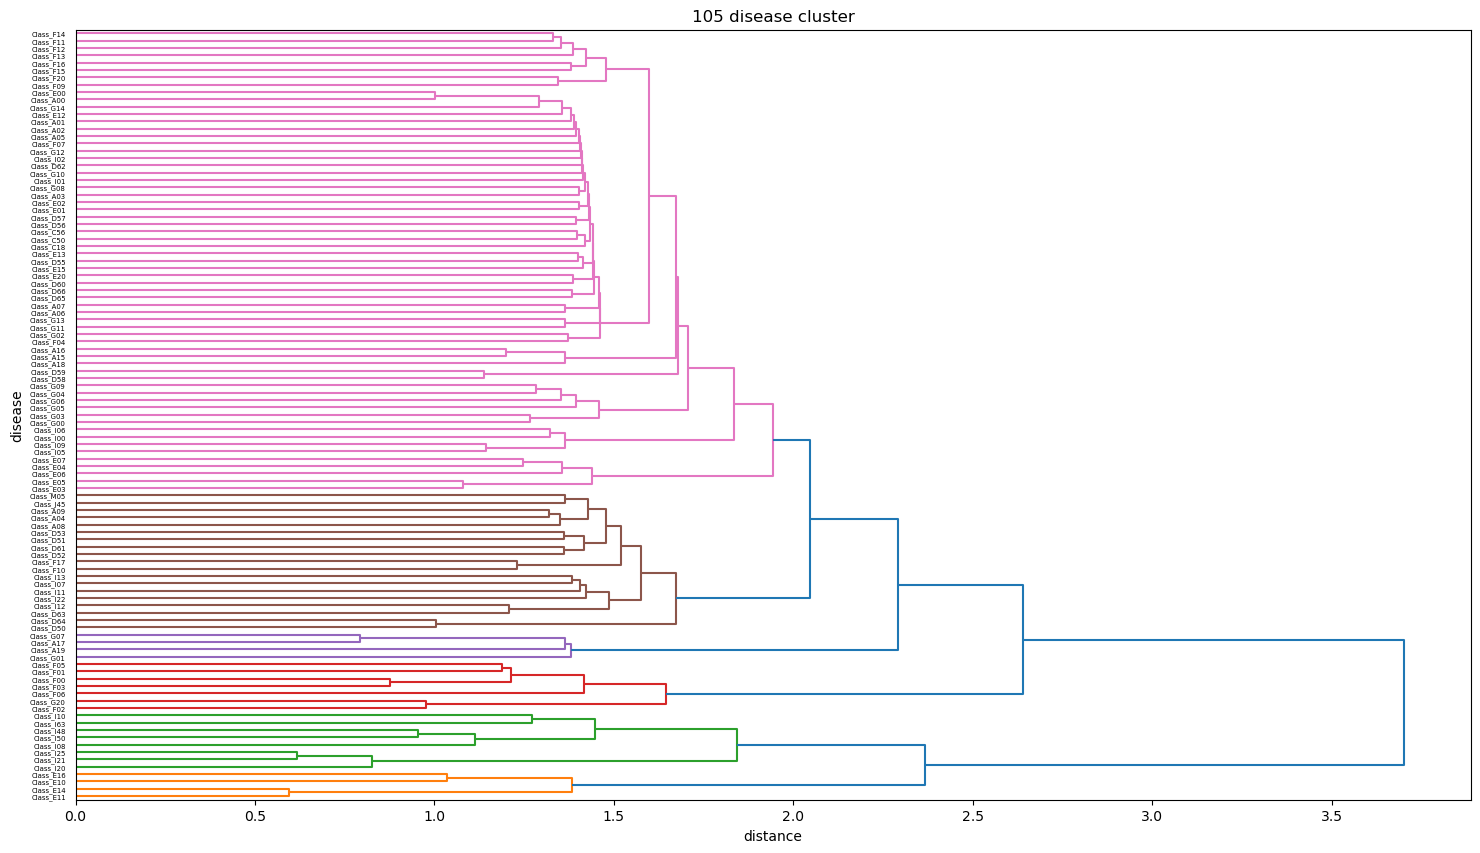

In [29]:
plt.figure(figsize=(18, 10))
dendrogram(linked, labels=correlation_matrix.columns, orientation='right', color_threshold=2)
plt.title('105 disease cluster')
plt.xlabel('distance')
plt.ylabel('disease')
plt.show()

In [47]:
# 佐证大类小类之间的关系